In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from myPDS import compute_and_plot_fft, LowPassFIR


In [3]:
data = np.genfromtxt('system3_data.csv', delimiter=',')
sig_raw = data[:,1]
sig_raw = sig_raw[1:]

N = sig_raw.size
Fs = 5.0


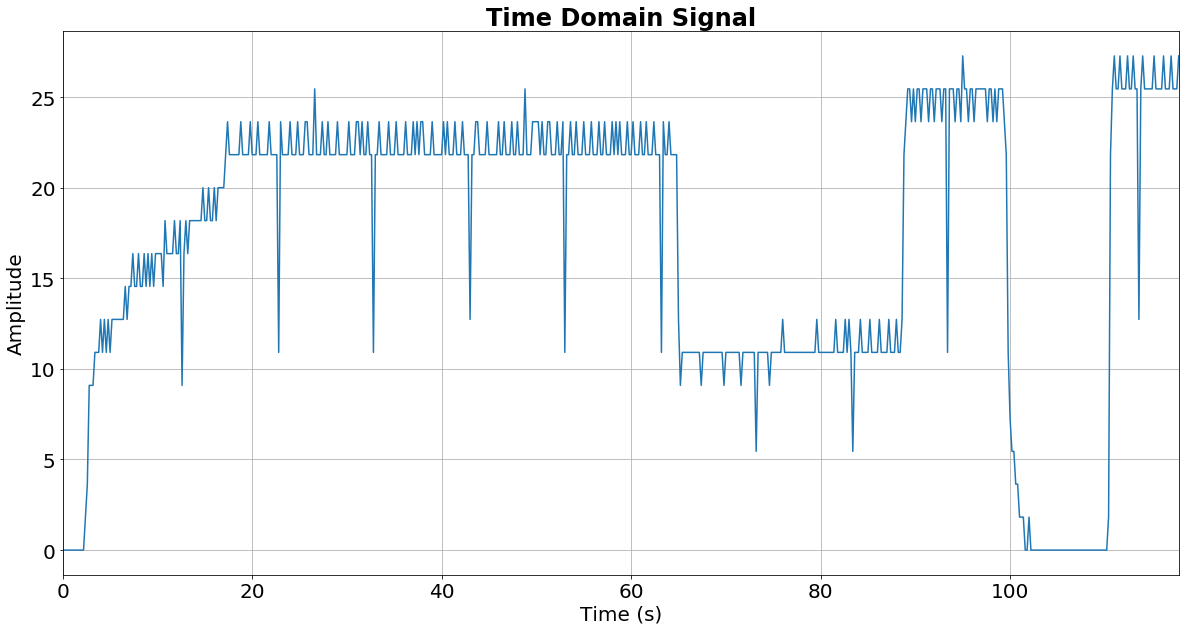

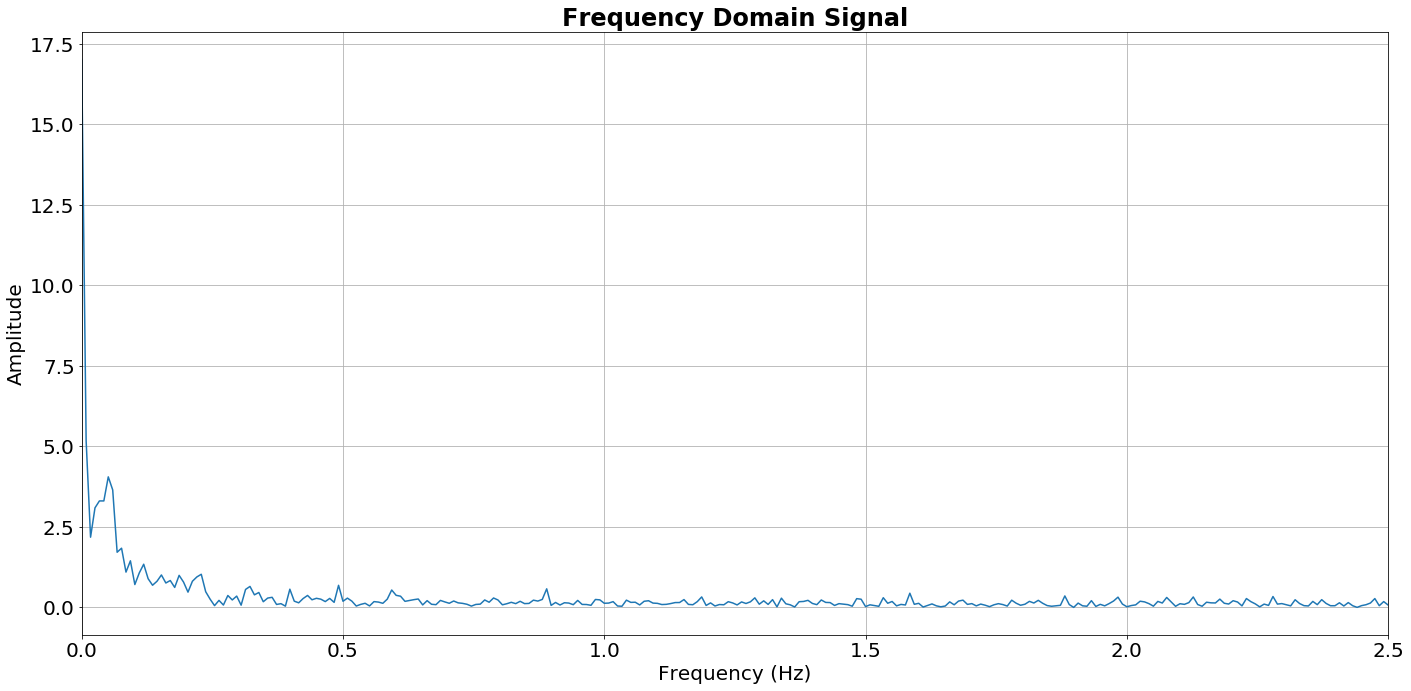

array([ 1.00404000e+04+0.00000000e+00j, -7.22327585e+02-1.34651245e+03j,
       -5.00935244e+02+4.03767820e+02j, -5.76171699e+02-7.07271849e+02j,
        9.61883405e+02-1.63117711e+02j,  7.72530195e+02+5.95928501e+02j,
        5.25046999e+02+1.07472933e+03j, -4.48218236e+02+9.79007733e+02j,
       -3.81214974e+02+3.32222476e+02j, -3.44602390e+02+4.19282918e+02j,
       -2.57974191e+02+1.95432242e+02j, -2.54289009e+02+3.43221911e+02j,
       -1.01671195e+02+1.83378855e+02j, -3.51740767e+01+3.14106931e+02j,
       -3.27679582e+02+2.22037523e+02j, -2.63154949e+02-6.49651061e+00j,
       -1.48741519e+02-1.38691728e+02j,  2.28552604e+02-7.19965711e+01j,
        1.66929749e+02+2.46274072e+02j,  1.14826930e+02+1.92318605e+02j,
        3.23850884e+01+2.44450452e+02j,  2.67312841e+01+1.81371082e+02j,
        2.56838186e+01+2.92757967e+02j, -2.99504774e+01+2.30056368e+02j,
        5.03623332e+01+1.30787734e+02j, -3.96422825e+00+2.39838667e+02j,
       -1.34803411e+00+2.79147091e+02j, -2.06539421

In [4]:
compute_and_plot_fft(sig_raw, Fs)

In [13]:
fir_lp = LowPassFIR(fc=0.08, transition_width=0.5, stopband_attenuation=40, passband_ripple=0.1, Fs=Fs)
b = fir_lp.getFilterCoeffs()


hanning


/tmp/ipykernel_25143/644421742.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(b.T)


31

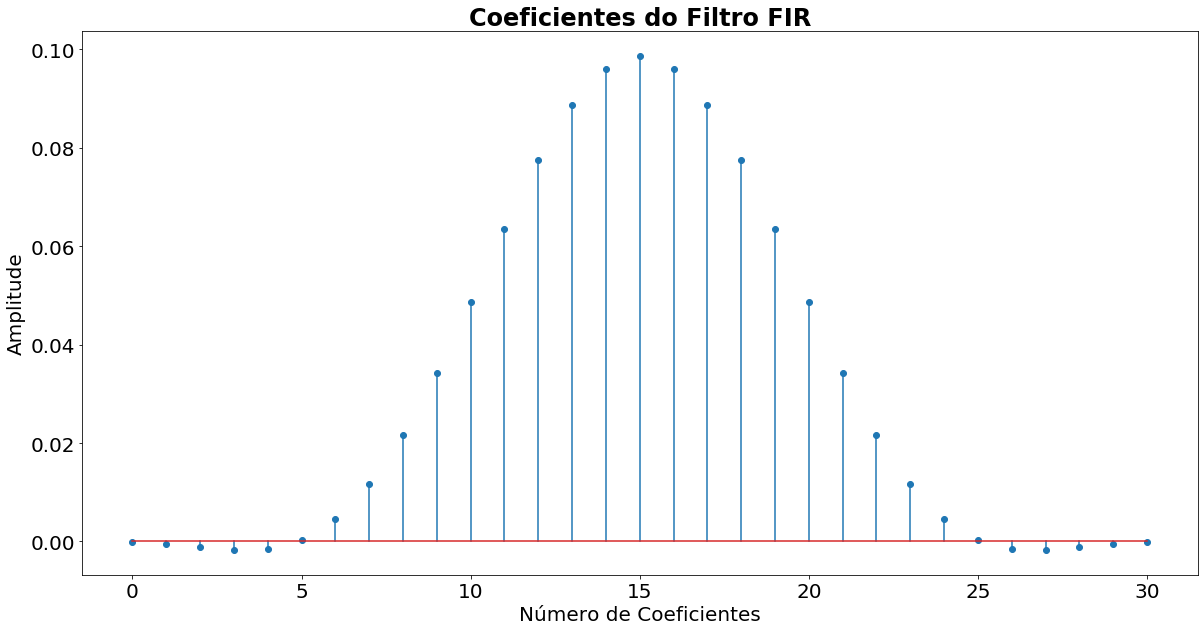

In [14]:
plt.figure(1, figsize=(20,10))
plt.title("Coeficientes do Filtro FIR", fontweight="bold")
plt.xlabel("Número de Coeficientes")
plt.ylabel("Amplitude")
plt.stem(b.T)
print(fir_lp.getWindow())
b.size

In [15]:
sig_raw = sig_raw.reshape(sig_raw.size)
b = b.reshape(b.size)

y = np.convolve(sig_raw, b)


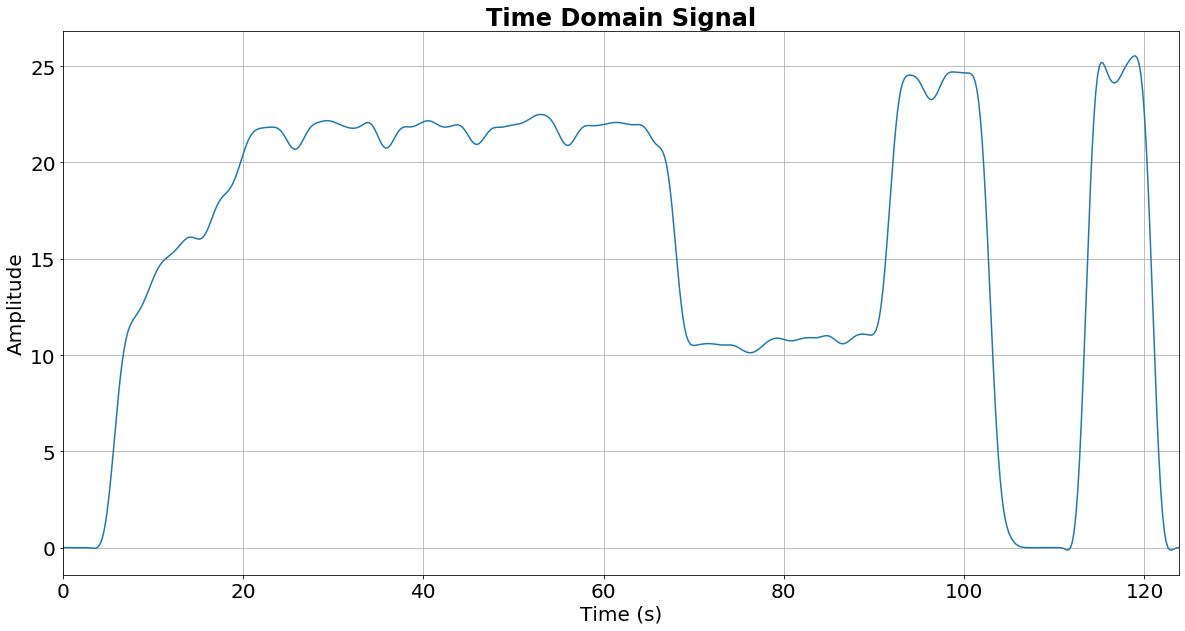

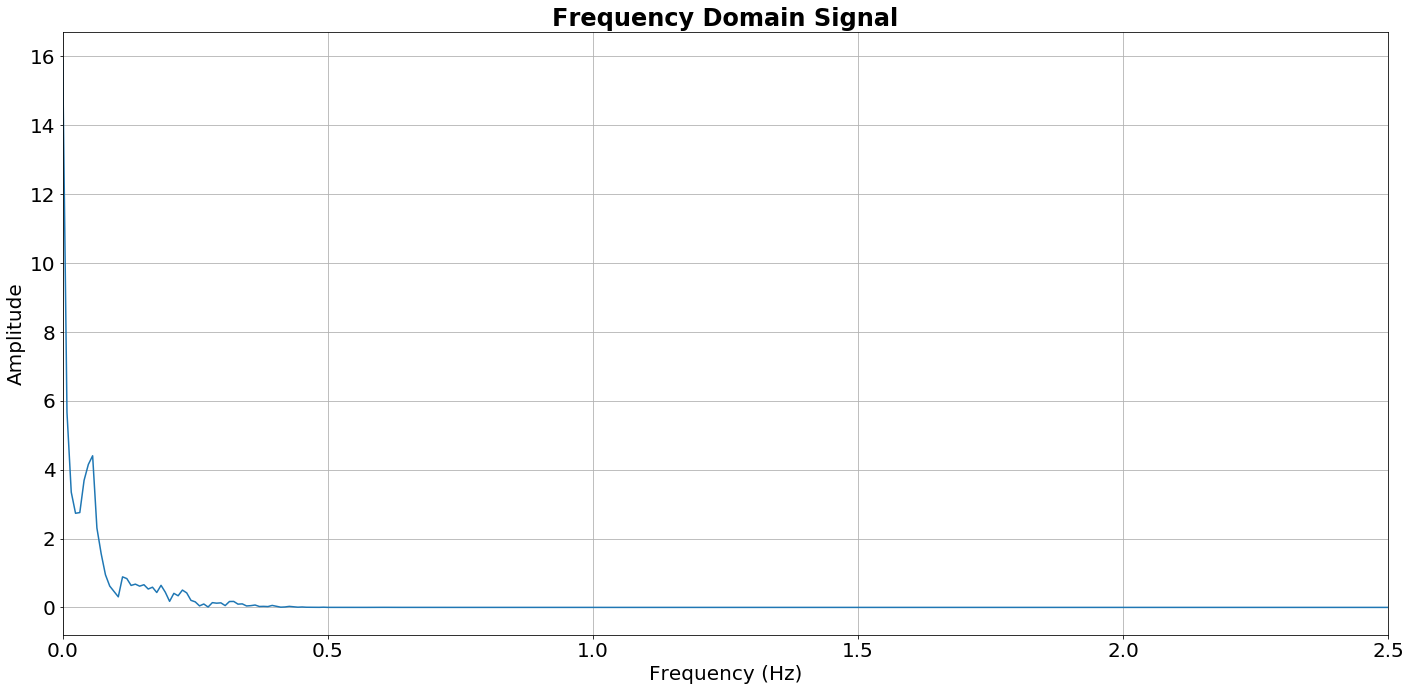

array([ 9.86471086e+03+0.00000000e+00j, -1.20183097e+03-1.27925686e+03j,
       -8.68159291e+02+5.67477513e+02j, -7.16004150e+02-4.52919198e+02j,
        7.53551973e+02+4.00997407e+02j,  1.22797883e+02+1.13694070e+03j,
       -4.17798036e+02+1.21714993e+03j, -1.20740836e+03+6.36336887e+02j,
       -7.10844897e+02-7.45886190e+01j, -4.74318764e+02+8.99062046e+01j,
       -2.76806280e+02-9.77388988e+01j, -1.87854961e+02+3.95939524e+01j,
       -4.18067026e+01-1.36479306e+02j, -8.19646192e+01-4.82001547e+01j,
       -1.79389995e+02-2.08312309e+02j,  1.17100217e+02-2.31291967e+02j,
        1.90266913e+02-5.38041594e+01j,  1.72622391e+02+1.18341417e+02j,
       -1.50138364e+02+1.18291834e+02j, -1.39014770e+02-1.49416057e+02j,
       -9.58206243e+01-1.34807272e+02j, -1.82273773e+01-1.80836275e+02j,
        4.01154832e-01-1.34176984e+02j,  1.57872522e+01-1.98071570e+02j,
        5.87068501e+01-1.23270987e+02j,  1.70067472e+01-5.18935516e+01j,
        6.96510068e+01-1.05511494e+02j,  7.87586556

In [16]:
compute_and_plot_fft(y, Fs)

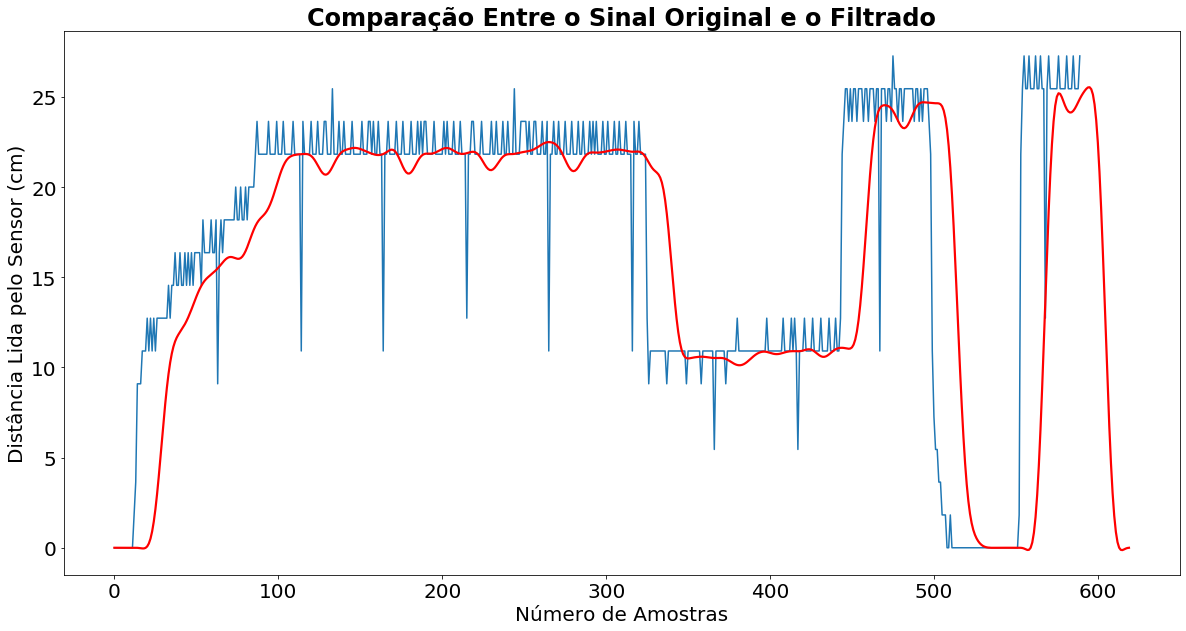

In [17]:
plt.figure(1, figsize=(20,10))
plt.title("Comparação Entre o Sinal Original e o Filtrado", fontweight="bold")
plt.xlabel("Número de Amostras")
plt.ylabel("Distância Lida pelo Sensor (cm)")
plt.plot(sig_raw)
plt.plot(y, color='r', linewidth = 2.2)

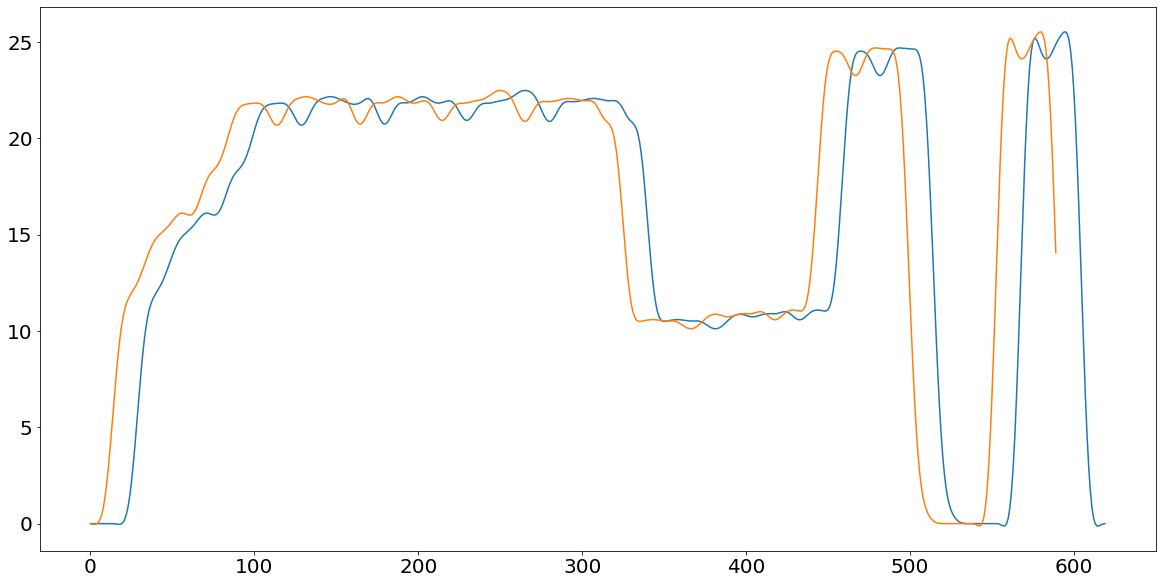

In [18]:
y1 = y[int(b.size/2):-int(b.size/2)]
plt.figure(1, figsize=(20,10))
plt.plot(y)
plt.plot(y1)

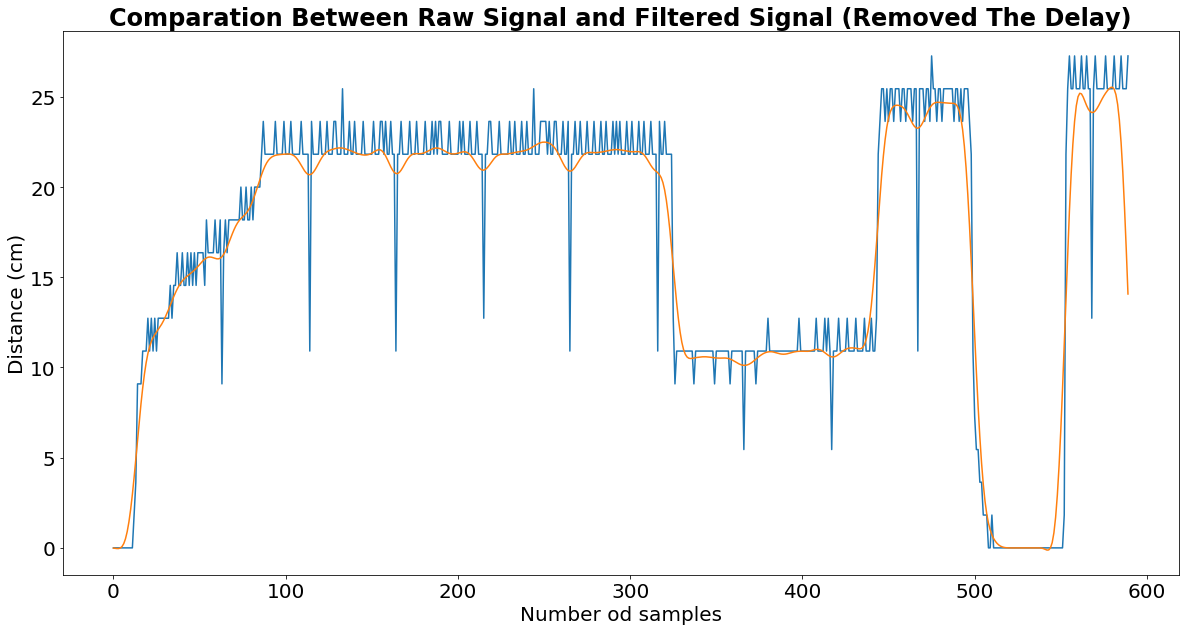

In [19]:
plt.figure(1, figsize=(20,10))
plt.title("Comparation Between Raw Signal and Filtered Signal (Removed The Delay)", fontweight="bold")
plt.xlabel("Number od samples")
plt.ylabel("Distance (cm)")
plt.plot(sig_raw)
plt.plot(y1)

In [20]:
from os.path import isfile
from os import remove

if isfile("filter_coeffs.txt"):
  remove("filter_coeffs.txt")

with open("filter_coeffs.txt", "a") as file:
  for coeff in b:
    file.write(str(coeff)+'\n')
  file.close()



In [21]:
max(y)

25.531879581090895

In [22]:
wf, hf = freqz(b.T, 1, worN=1024, fs=Fs)


Text(0.5, 1.0, 'Frequency Response')

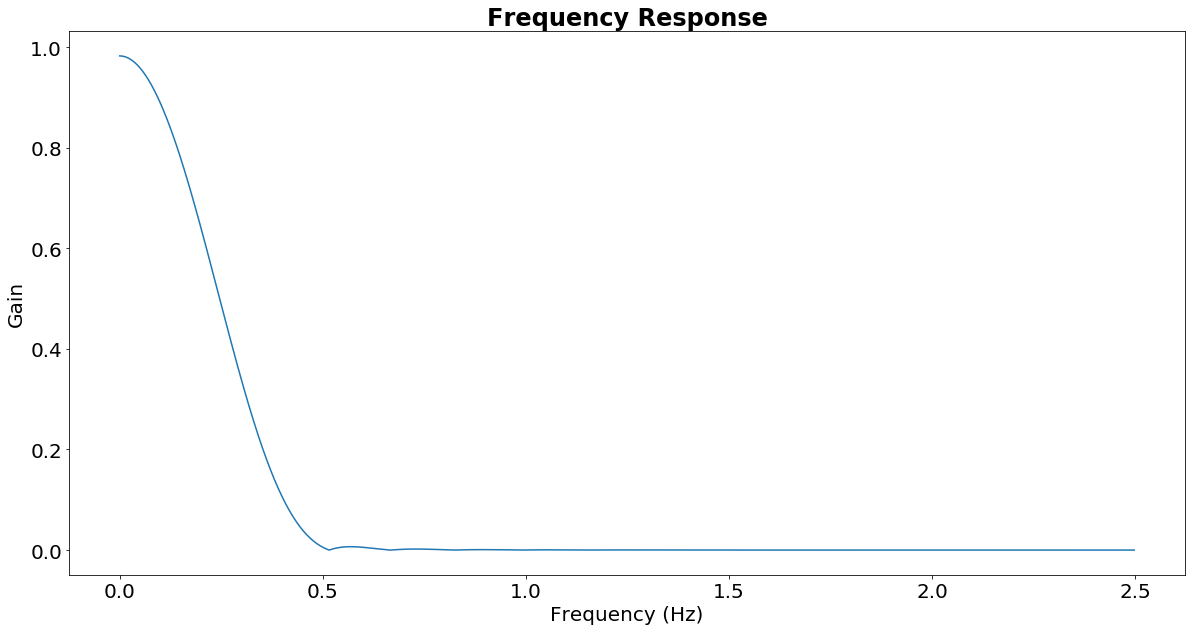

In [23]:
plt.figure(1, figsize=(20,10))
plt.plot(wf, np.absolute(hf))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.title("Frequency Response", fontweight="bold")


Text(0.5, 1.0, 'Resposta em Frequência do Filtro')

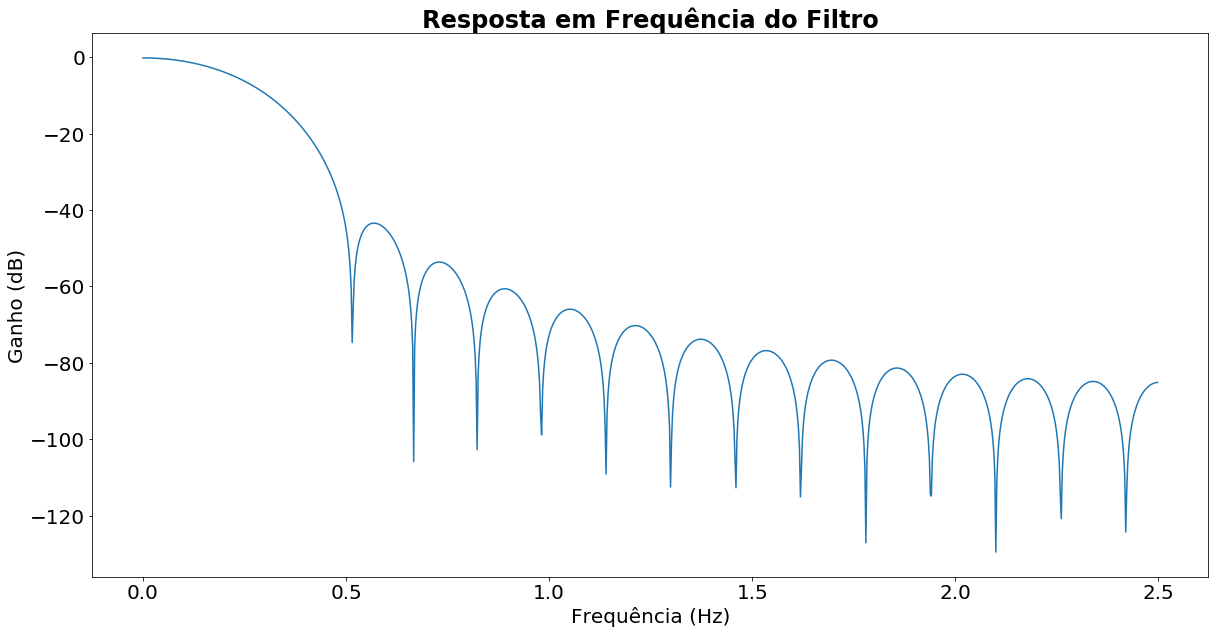

In [24]:
# Plotagem em dB
plt.figure(1, figsize=(20,10))
plt.plot(wf, 20*np.log10(np.absolute(hf)))
plt.xlabel("Frequência (Hz)")
plt.ylabel("Ganho (dB)")
plt.title("Resposta em Frequência do Filtro", fontweight="bold")